# The data is of McDonalds Menu and contains details about all the beverages and food items served by them. We were given nutrition data about every item in the menu. We have firstly explored the data and cleaned it. After that, we have performed EDA on it.

In [65]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration :

Feature Description:
Menu Category - The category where the particular menu item belongs.
Menu Items - The List of all Items served
Per Serve Size - The Quantity (in g or ml) of a particular menu item served.
Energy - The amount of Energy (kCal) per serving
Protein - The amount of Protein (g) per serving
Total Fat - The amount of Total fat (g) per serving
Sat Fat - The amount of Saturated fat (g) per serving
Trans Fat - The amount of Trans fat (g) per serving
Cholestrol - The amount of Cholestrol (mg) per serving
Total Carbohydrates - The amount of Carbohydrates (g) per serving

In [66]:
data=pd.read_csv("downloads/India_Menu.csv")
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [67]:
data['Menu Category'].unique()

array(['Regular Menu', 'Breakfast Menu', 'McCafe Menu', 'Desserts Menu',
       'Gourmet Menu', 'Beverages Menu', 'Condiments Menu'], dtype=object)

In [68]:
data.shape

(141, 13)

In [69]:
data.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

The following table describes count, mean, standard deviation, minimum,1st quartile,2nd quartile,3rd quartile, maximumvalues of each numerical attribute.

In [70]:
df1=pd.DataFrame(data.describe())
df1

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


Null Value Distribution:

In [71]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [72]:
data[data['Sodium (mg)'].isnull()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228 g,443.4,25.63,17.3,4.01,0.19,64.19,43.29,9.29,6.32,NaN


# Data Cleaning:
We have one value missing from the "Sodium" attribute. Dropping it causes 0.7% loss of data, which is not significant hence we dropping it does'nt make a big difference but here we use "Median Replacement" method to replace the missing value with the median of that particular coloumn.

In [73]:
median_value=data['Sodium (mg)'].median()
data['Sodium (mg)'].fillna(median_value,inplace=True)

⭐Important Observations :
* There are total of 13 columns and 141 rows in data.
* Train data contains 1833 observation with 1 missing value.
* Only Sodium attribute has 1 missing value.

Exploratory Data Analysis :

Content Analysis with help of Menu Category :

<AxesSubplot:ylabel='Menu Category'>

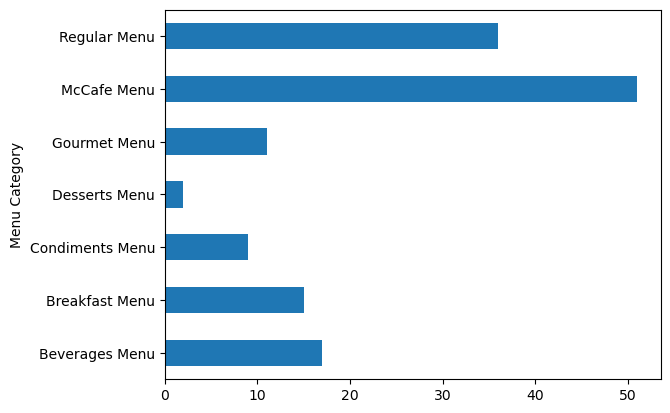

In [74]:
data.groupby('Menu Category')['Menu Category'].count().plot.barh()

In [75]:
features=['Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)']
df1=pd.DataFrame(data.groupby('Menu Category')[features].mean())
df1

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
Menu Category,,,,,,,,,,
Beverages Menu,143.326471,0.268235,0.308824,0.225882,0.008824,0.829412,34.851765,34.677059,34.025882,37.604118
Breakfast Menu,181.290000,7.636667,7.735333,4.354000,0.146000,61.010667,21.074000,4.358667,1.220000,360.378000
Condiments Menu,47.473333,0.731111,3.876667,0.572222,0.067778,1.834444,8.287778,6.104444,1.691111,121.148889
Desserts Menu,162.875000,2.815000,5.255000,3.160000,0.095000,6.400000,26.055000,19.920000,15.015000,115.815000
Gourmet Menu,543.497273,21.684545,27.671818,11.987273,0.194545,73.210909,49.179091,8.799091,4.811818,1166.438636
McCafe Menu,183.679608,4.295490,5.945686,4.558824,0.219804,12.861373,29.039412,22.615490,13.680980,103.371961
Regular Menu,367.737778,12.990833,17.625833,7.213333,2.233333,35.987222,37.237778,5.019444,1.801667,704.758333


In [76]:
features=['Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)']
df2=pd.DataFrame(data.groupby('Menu Category')[features].median())
df2

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
Menu Category,,,,,,,,,,
Beverages Menu,145.160,0.000,0.000,0.00,0.000,0.00,32.420,32.370,32.370,34.740
Breakfast Menu,183.610,8.600,10.020,5.15,0.170,25.31,16.670,2.500,0.000,275.260
Condiments Menu,51.030,0.510,0.490,0.08,0.010,0.25,7.240,2.540,1.340,71.050
Desserts Menu,162.875,2.815,5.255,3.16,0.095,6.40,26.055,19.920,15.015,115.815
Gourmet Menu,524.690,22.440,24.530,11.56,0.190,48.74,46.000,7.900,3.840,1174.270
McCafe Menu,185.850,3.590,5.470,3.66,0.190,8.55,25.560,21.100,12.490,96.440
Regular Menu,344.895,11.265,14.500,5.95,0.145,24.95,39.090,3.475,0.350,564.195


In [77]:
#Maximum Energy
data[data['Energy (kCal)']==data['Energy (kCal)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
107,Gourmet Menu,Chicken Cheese Lava Burger,307 g,834.36,27.37,45.18,17.0,0.27,73.11,76.03,16.75,10.01,1745.04


In [78]:
#Maximum Protein
data[data['Protein (g)']==data['Protein (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,301 g,641.36,39.47,31.51,9.54,0.26,110.37,46.24,9.16,6.32,1906.27


In [79]:
#Maximum Total fat
data[data['Total fat (g)']==data['Total fat (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
107,Gourmet Menu,Chicken Cheese Lava Burger,307 g,834.36,27.37,45.18,17.0,0.27,73.11,76.03,16.75,10.01,1745.04


In [80]:
#Maximum Sat Fat
data[data['Sat Fat (g)']==data['Sat Fat (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
110,Gourmet Menu,McSpicy Premium Veg Burger,212.5 g,634.71,22.44,39.21,20.46,0.2,43.68,46.0,7.57,3.28,1446.87


In [81]:
#Maximum Trans Fat
data[data['Trans fat (g)']==data['Trans fat (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
25,Regular Menu,5 piece Chicken Strips,145 g,411.09,25.43,28.54,0.15,75.26,6.7,0.73,0.72,0.0,1193.05


In [82]:
#Maximum Cholestrols
data[data['Cholesterols (mg)']==data['Cholesterols (mg)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
109,Gourmet Menu,McSpicy Premium Chicken Burger,264.5 g,622.25,31.49,34.65,15.55,0.24,302.61,43.6,6.07,2.64,1614.88


In [83]:
#Maximum Total Carbohydrates
data[data['Total carbohydrate (g)']==data['Total carbohydrate (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22


In [84]:
#Maximum Total Sugars
data[data['Total Sugars (g)']==data['Total Sugars (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
120,Beverages Menu,Large Fanta Oragne,544 ml,256.88,0.0,0.0,0.0,0.0,0.0,64.22,64.22,64.22,110.16


In [85]:
#Maximum Added Sugars
data[data['Added Sugars (g)']==data['Added Sugars (g)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
120,Beverages Menu,Large Fanta Oragne,544 ml,256.88,0.0,0.0,0.0,0.0,0.0,64.22,64.22,64.22,110.16


In [86]:
#Maximum Sodium
data[data['Sodium (mg)']==data['Sodium (mg)'].max()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,325 g,720.3,26.91,29.2,5.08,0.3,31.32,77.47,3.28,0.35,2399.49


# HeatMap Analysis:
The following HeatMap will tell us the correlation between all the attributes :

<AxesSubplot:>

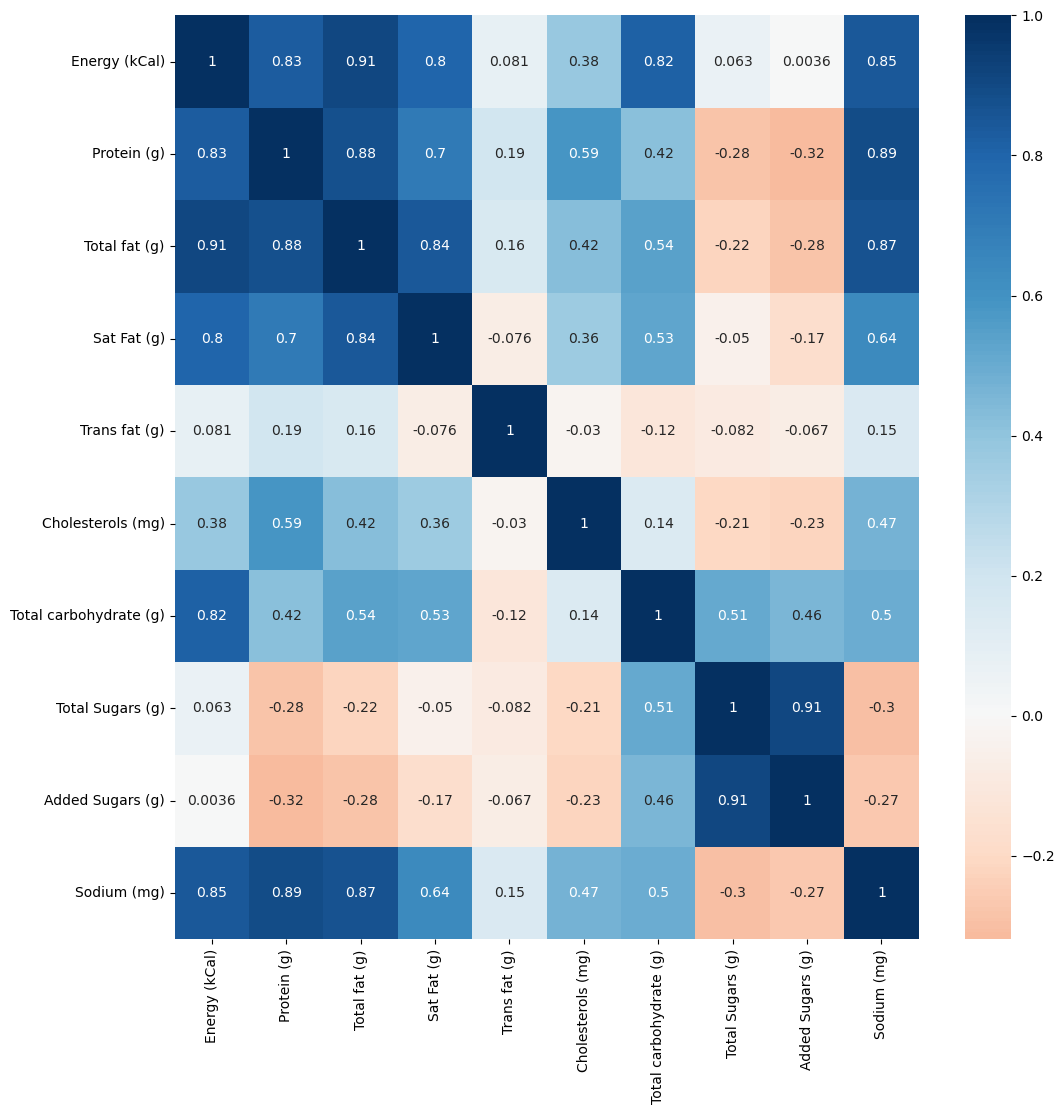

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True, cmap='RdBu',center=0)

⭐Important Observations :
* Gourment Menu has the highest overall nutritional value.
* The Sugar content in the Beverages Menu is higher than Desserts Menu.This indicates that Beverages are more sweeter than Desserts.
* Energy has a high correlation with Protein Total Fat Saturated Fat Total Carbohydrate Trans Fat and Sodium. This implies that the food with high energy levels also have a high content of the attributes Energy has high correlation with.
* Total Fat and Protein has almost no correlation with Total Sugars and Added Sugars.
* Beverages and Desserts have a high sugar content hence we can conclude that they provide highest amount of instant energy.
* The Chicken Lava Cheese Burger has the highest amount of Energy and Total Fat.
* The McSpicy Premium Veg Burger and McSpicy Premium Chicken Burger have highest amount of Saturated Fat and Cholestrol.
* The Large Fanta Oragne has highest amount of Overall Sugar.
* The Veg Maharaja Mac has highest amount of Total Carbohydrate.